First 5 records:
   Systolic_BP  Diastolic_BP  Heart_Rate  Hypertension-Tests
0          113            78          65                   0
1          155            95          95                   1
2          177            77          92                   1
3          124            81          56                   0
4          179            92          77                   1

Summary Statistics:
        Systolic_BP  Diastolic_BP    Heart_Rate  Hypertension-Tests
count  10000.000000   10000.00000  10000.000000         10000.00000
mean     134.499500      89.80030     85.074600             0.70860
std       26.199936      17.78621     20.526587             0.45443
min       90.000000      60.00000     50.000000             0.00000
25%      112.000000      74.00000     67.000000             0.00000
50%      134.000000      90.00000     85.000000             1.00000
75%      158.000000     105.00000    103.000000             1.00000
max      180.000000     120.00000    120.000000     

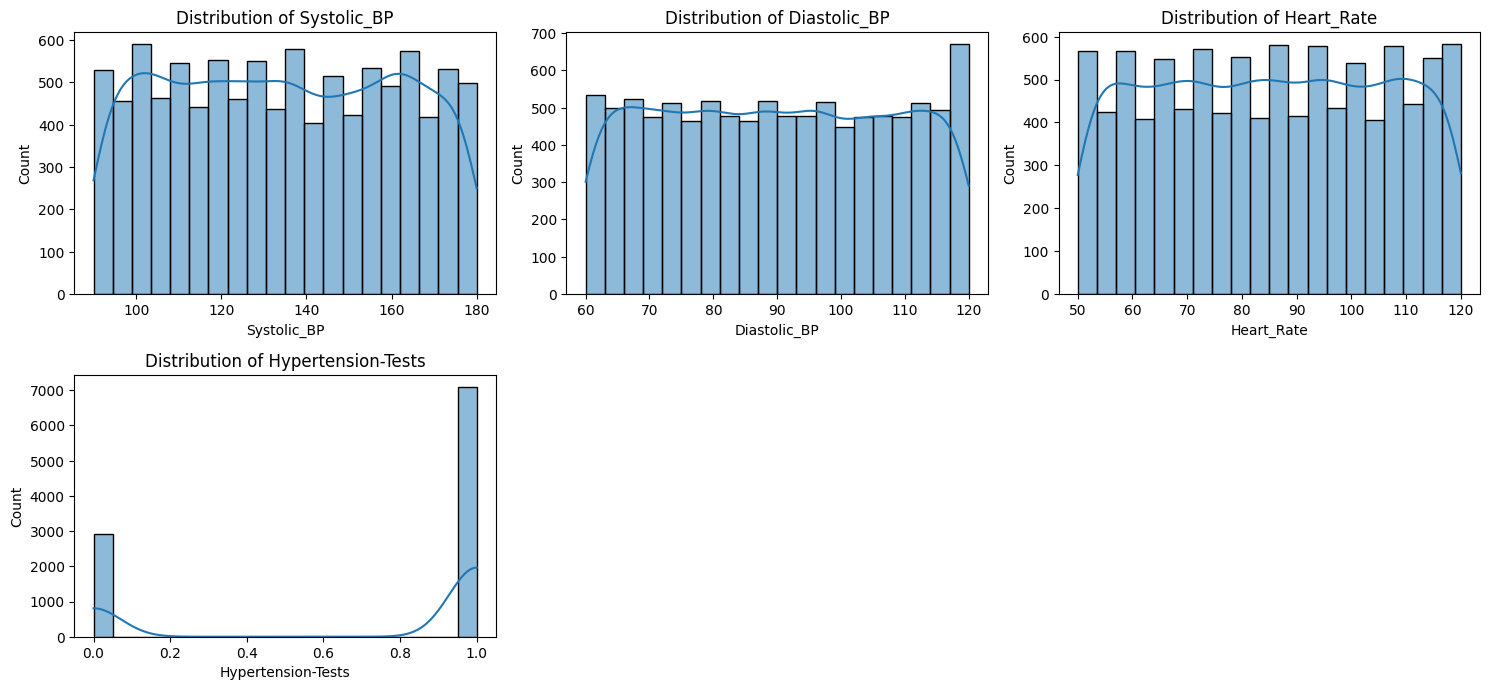

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Load the dataset - ensure the file path is correct
data_path = 'E:/Hypertension-Tool/backend/Hypertension-Data-Set.csv'
df = pd.read_csv(data_path)

# ============================
# 1. Data Exploration and EDA
# ============================

# Display the first few records, descriptive statistics, and information about the dataframe
print("First 5 records:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())
print("\nData Info:")
print(df.info())

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values by column:")
print(missing_values)

# Visualize distributions of numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

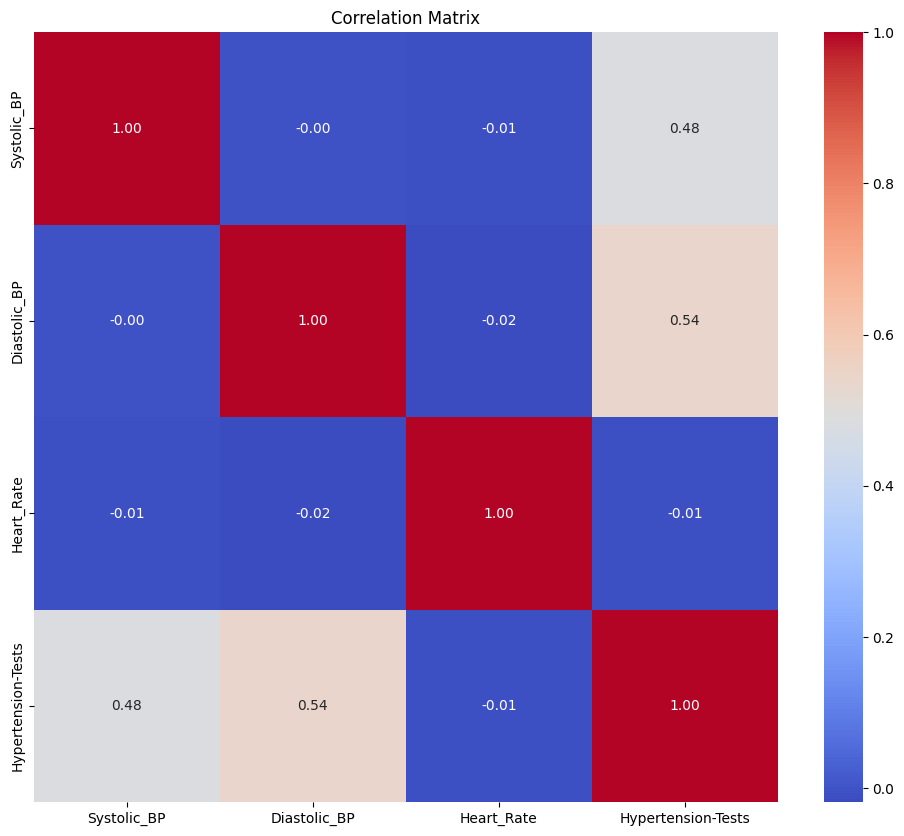

In [2]:
# Correlation heatmap to understand relationships between variables
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [3]:
for col in numeric_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Define the target column: Adjust the column name if needed.
target_col = 'Hypertension-Tests'  # Assumed binary outcome (1 = presence; 0 = absence)
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset!")

In [4]:
# Separate features (X) and target (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

# Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (8000, 3)
Testing set shape: (2000, 3)


In [5]:
print("\n--- Logistic Regression ---")

# Set up logistic regression
# You can adjust the regularization strength (C) as needed.
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_lr = lr.predict(X_test)
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))



--- Logistic Regression ---
Accuracy (Logistic Regression): 0.903

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       602
           1       0.92      0.94      0.93      1398

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



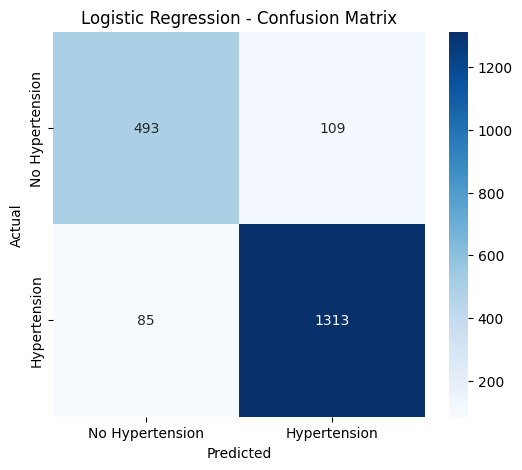

In [6]:
# Plot confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Hypertension', 'Hypertension'],
            yticklabels=['No Hypertension', 'Hypertension'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


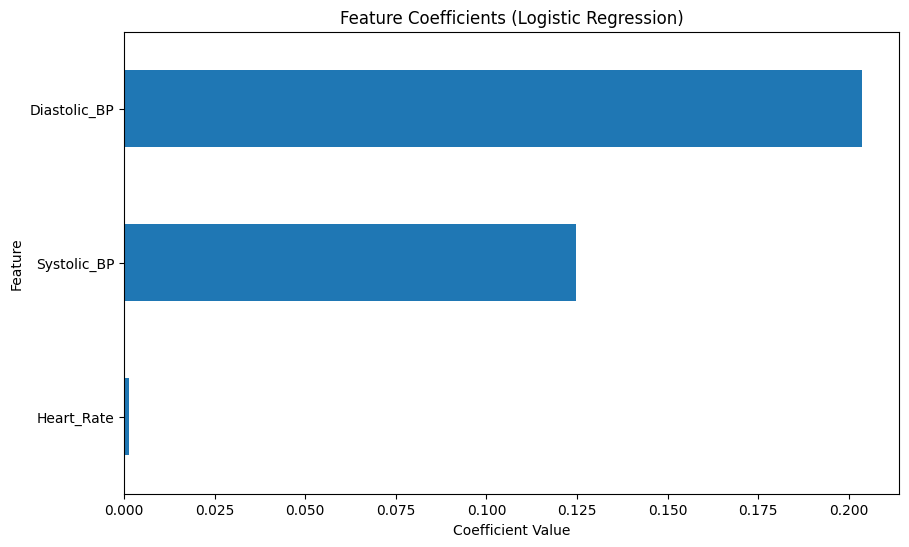

In [7]:
# Visualize the coefficients as a proxy for feature importance
coefficients = pd.Series(lr.coef_[0], index=X.columns)
coefficients = coefficients.sort_values()
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.title("Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


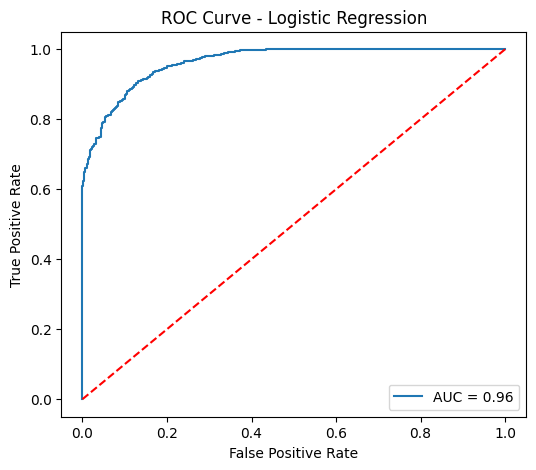

In [8]:
# Plot ROC Curve for Logistic Regression
y_pred_lr_prob = lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0,1], [0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [9]:
# ---- Model 2: Gradient Boosting Classifier ----
print("\n--- Gradient Boosting Classifier ---")

# Set up the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# (Optional) Set up a small hyperparameter grid to improve performance via GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train, y_train)
print("Best parameters found (Gradient Boosting):", gb_grid.best_params_)


--- Gradient Boosting Classifier ---
Best parameters found (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


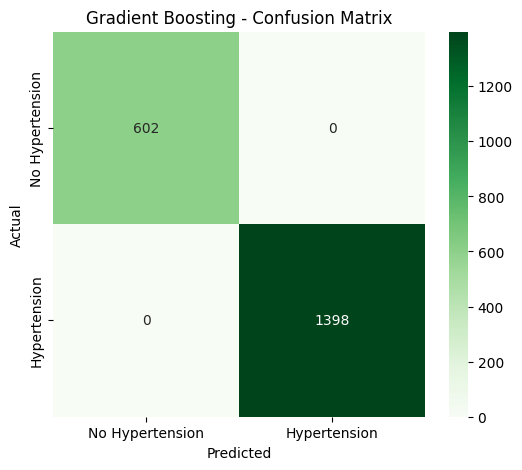

In [10]:
# Make predictions using the best Gradient Boosting model
y_pred_gb = gb_grid.best_estimator_.predict(X_test)

# Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Hypertension', 'Hypertension'],
            yticklabels=['No Hypertension', 'Hypertension'])
plt.title('Gradient Boosting - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


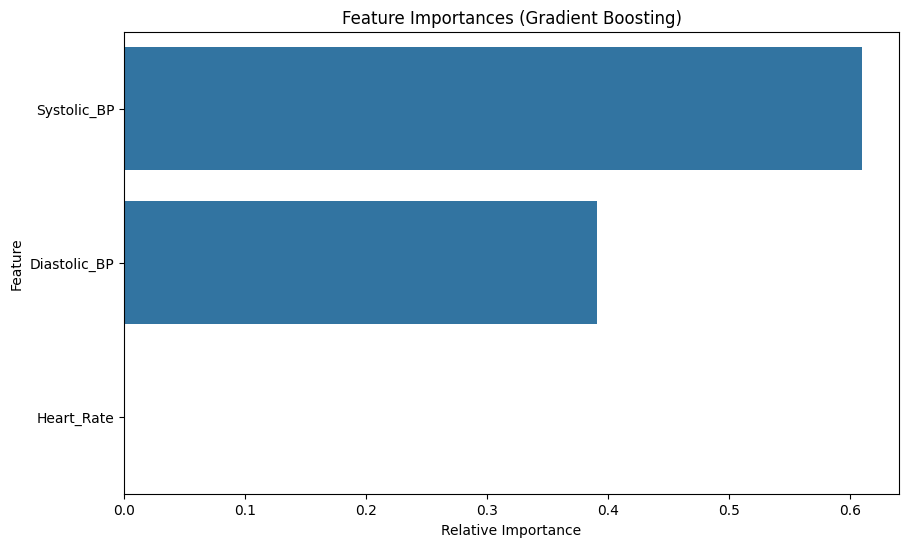

In [11]:
# Feature importance from Gradient Boosting
best_gb = gb_grid.best_estimator_  # Assign the best Gradient Boosting model
importances_gb = pd.Series(best_gb.feature_importances_, index=X.columns)
importances_gb = importances_gb.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_gb, y=importances_gb.index)
plt.title("Feature Importances (Gradient Boosting)")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()


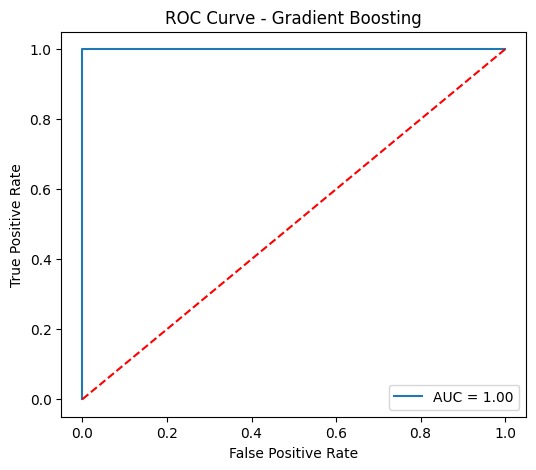

In [12]:
# ROC Curve for Gradient Boosting
y_pred_gb_prob = best_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb_prob)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.figure(figsize=(6, 5))
plt.plot(fpr_gb, tpr_gb, label=f'AUC = {roc_auc_gb:.2f}')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

In [13]:
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder

# Save the Logistic Regression model to a file
lr_model_path = 'logistic_regression_model.joblib'
dump(lr, lr_model_path)
print(f"Logistic Regression model saved to {lr_model_path}")


# Load the Logistic Regression model from the file
loaded_lr_model = load(lr_model_path)
print("Logistic Regression model loaded successfully")
# Save the Label Encoder to a file
label_encoder = LabelEncoder()
label_encoder_path = 'label_encoder_model_2.joblib'
dump(label_encoder, label_encoder_path)
print(f"Label Encoder saved to {label_encoder_path}")

# Load the Label Encoder from the file
loaded_label_encoder = load(label_encoder_path)
print("Label Encoder loaded successfully")
# Save the Gradient Boosting model to a file
gb_model_path = 'gradient_boosting_model.joblib'
dump(best_gb, gb_model_path)
print(f"Gradient Boosting model saved to {gb_model_path}")

# Load the Gradient Boosting model from the file
loaded_gb_model = load(gb_model_path)
print("Gradient Boosting model loaded successfully")

Logistic Regression model saved to logistic_regression_model.joblib
Logistic Regression model loaded successfully
Label Encoder saved to label_encoder_model_2.joblib
Label Encoder loaded successfully
Gradient Boosting model saved to gradient_boosting_model.joblib
Gradient Boosting model loaded successfully
